# Bank Data Analysis

# Objective

In this case study, you will be working on Banking Data Analysis using Apache Spark, a powerful distributed computing framework designed for big data processing. This assignment aims to give you hands-on experience in analyzing large-scale banking datasets using PySpark and AWS services. You will apply techniques learned in data analytics to clean, transform, and explore banking data, drawing meaningful insights to support financial decision-making. Apart from understanding how big data tools can optimize performance on a single machine and across clusters, you will develop a structured approach to analyzing market capitalization trends, currency conversions, and global banking performance. Additionally, you will use AWS S3 to store the processed data once the ETL pipeline is complete, ensuring efficient data management and retrieval.


# Business Value

The banking industry operates in a highly competitive and globalized market where financial institutions must continuously monitor their market position, performance, and currency fluctuations. To stay competitive, banks must leverage data-driven insights to optimize their financial strategies, assess market trends, and make informed decisions. In this assignment, you will analyze banking data to uncover patterns in market capitalization, currency conversions, and global rankings. With Apache Spark's ability to handle large datasets efficiently, financial institutions can process vast amounts of data in real-time, helping them make faster and more informed decisions.


As an analyst at a financial institution, your task is to examine historical banking data to derive actionable insights that can drive strategic growth. Your analysis will help identify the top 10 largest banks by market capitalization, convert market cap values into multiple currencies (USD, GBP, EUR, INR), and store the processed data for easy retrieval. To enhance scalability and accessibility, you will utilize AWS S3 for data storage, ensuring seamless integration with cloud-based analytics tools. By leveraging big data analytics and cloud services, financial institutions can streamline operations, enhance decision-making, and maximize revenue opportunities.


# Dataset

The data for this project can be accessed from the following [wikipedia link](https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks).

The dataset used in this analysis comprises global banking data extracted from a Wikipedia page (List of Largest Banks) archived as of September 2023.

It includes rankings of the world's largest banks based on market capitalization (in USD billions) and is structured into a single table with three columns. The data was scraped programmatically, cleaned, and transformed using PySpark to support cross-currency analysis. Exchange rate data (for USD, GBP, EUR, and INR) was sourced from a CSV file to enable currency conversions. The processed dataset is stored in CSV and SQLite formats for accessibility and efficient querying.

The dataset consists of a single table (Largest_banks) with the following three key attributes:
- **Rank:** Numerical position of the bank based on market capitalization.
- **Bank Name:** Name of the financial institution.
- **Market Cap (USD Billion):** Market valuation of the bank in USD billions.
This dataset enables analysis of global banking trends, cross-currency valuations, and the relative market dominance of financial institutions.

An additional data on market exchange rates is available to compare the marketcap dealing with different currencies.


<h2>Assignment Tasks</h2>

<ol>
    <li>
        <strong>Data Preparation</strong>
        <p>The dataset consists of a structured table containing global banking data. Before performing any analysis, it is crucial to prepare the data to ensure consistency and efficiency in processing.</p>
        Check for data consistency and ensure all columns are correctly formatted.<br>
        Structure and prepare the data for further processing and analysis.<br>
</br>
    <li>
        <strong>Data Cleaning</strong>
        <ul>
            2.1. <strong>Handling Missing Values:</strong> Decide on an approach to handle missing data (e.g., imputation or removal). Mention the approach in your report.<br>
            2.2. <strong>Fixing Columns:</strong> Ensure all columns are properly named and formatted.<br>
            2.3. <strong>Handling Outliers:</strong> Identify outliers in the dataset and explain why they are considered outliers. It is not necessary to remove them for this task, but mention your approach for handling them.<br>
        </ul>
</br>
    <li>
        <strong>Exploratory Data Analysis:</strong></br>
            EDA Finding Patterns - Analyze the dataset and find patterns based on the following points:
                <ul>
                    3.1. Convert PySpark DataFrame to Pandas DataFrame for visualization.<br>
                    3.2. Analyze the distribution of market capitalization using a histogram.<br>
                    3.3. Identify the top 10 banks by market capitalization using a bar chart.<br>
                    3.4. Visualize the relationship between market capitalization and bank ranking using a scatter plot.<br>
                    3.5. Use a boxplot to examine the spread and outliers in market capitalization.<br>
                    3.6. Display the quartile distribution of market capitalization using a violin plot.<br>
                    3.7. Compute cumulative market share and visualize it with a line plot.<br>
                    3.8. Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.<br>
                    3.9. Calculate and display market share distribution of top 10 banks using a pie chart.<br>
                </ul>
        </ul>
</br>
    <li>
        <strong>Banking Data ETL Querying</strong>
        <ul>
            4.1. Perform Advanced Market Capitalization Analysis with Growth Metrics.<br>
            4.2. Analyze Market Concentration and Categorize Banks Based on Market Share Tiers.<br>
            4.3. Examine Statistical Distribution of Market Capitalization Using Quartile Analysis.<br>
            4.4. Conduct Comparative Size Analysis to Classify Banks by Relative Market Size.<br>
            4.5. Evaluate Market Growth and Identify Gaps Between Consecutive Banks.<br>
            4.6. Assess Market Dominance by Measuring Cumulative Share and Dominance Score.<br>
            4.7. Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges.<br>
            4.8. Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics.<br>
        </ul>
    </br>
    <li>
        <strong>Conclusion</strong></br>
            Provide final insights and recommendations based on the analysis:</br>
            <ul>
            5.1 Recommendations to track and compare market capitalisation of the top global banks toevaluate competitiveness and dominance.</br>
            5.2 Suggestions to use cross-currency analysis (USD, GBP, EUR, INR) for consistent benchmarking
of financial institutions across regions.</br>
            5.3 Propose continuous monitoring of market share concentration to identify growth opportunities
for mid-tier banks.</br>
            5.4  Identify potential regions or banking segments for expansion by analysing gaps between tiers
of banks and regional trends.</br>
            </ul>
    </br>
    <li>
        <strong>Visualization Integration [Optional]</strong>
        <p>Enhance the project by incorporating a visualization component that connects the processed data stored in an S3 bucket to a business intelligence tool such as Tableau or Power BI. This involves setting up the connection between the S3 bucket and the chosen visualization tool, importing the processed dataset for analysis and visualization, creating interactive dashboards to explore key trends and insights and ensuring data updates are reflected dynamically in the visualization tool.<br>
        </ul>
</ol>

Import Required Libraries

In [1]:
# Import required libraries
import logging
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
# Import PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, round, count, when, isnull

In [2]:
# Initialize Spark session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

#**1. Data Preparation** <font color = red>[5 marks]</font> <br>


The data for this project can be accessed from the wikipedia link provided above. The page features data regarding global banking data.

Utilise the pandas method to read tables from the html document
and extract the requried data consists of a structured format.

Before performing any analysis, it is crucial to prepare the data to ensure consistency, and efficiency in processing.

In [3]:
# Initialize Spark session
from pyspark.sql.window import Window
# URL of the Wikipedia page
url = "https://web.archive.org/web/20230908091635/https://en.wikipedia.org/wiki/List_of_largest_banks"
# Use pandas to read all HTML tables from the page
tables = pd.read_html(url)
# Load the correct table (Table 1)
banks_df = tables[1]
# Convert pandas DataFrame to PySpark DataFrame
pyspark_df = spark.createDataFrame(banks_df)
# Rename columns
pyspark_df = pyspark_df.toDF("Rank","Bank_Name","Market_Cap_USD_Billion")
# Show the first few rows of the PySpark DataFrame
pyspark_df.show(5)
# Print the schema of the DataFrame
pyspark_df.printSchema()
# Configure logging
logfile = "code_log.txt"

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

+----+--------------------+----------------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|
+----+--------------------+----------------------+
|   1|      JPMorgan Chase|                432.92|
|   2|     Bank of America|                231.52|
|   3|Industrial and Co...|                194.56|
|   4|Agricultural Bank...|                160.68|
|   5|           HDFC Bank|                157.91|
+----+--------------------+----------------------+
only showing top 5 rows
root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market_Cap_USD_Billion: double (nullable = true)



Load the data for exchange rates

In [4]:
# Load the exchange rate data
exchange_rate_df = spark.read.csv("D:\IIITB\Projects\ETL_Bank_Data_Analysis_Updated\exchange_rate(in).csv", header=True, inferSchema=True)

# Show the first few rows of the exchange rate data to verify
exchange_rate_df.printSchema()
exchange_rate_df.show(5)

root
 |-- Currency: string (nullable = true)
 |-- Rate: double (nullable = true)

+--------+-----+
|Currency| Rate|
+--------+-----+
|     EUR| 0.93|
|     GBP|  0.8|
|     INR|82.95|
+--------+-----+



#**2. Data Cleaning** <font color = red>[20 marks]</font> <br>

##**2.1 Handle Missing Values** <font color = red>[10 marks]</font> <br>


In [5]:
# Print the schema to check data types
pyspark_df.printSchema()

root
 |-- Rank: long (nullable = true)
 |-- Bank_Name: string (nullable = true)
 |-- Market_Cap_USD_Billion: double (nullable = true)



In [6]:
# Check for missing values
pyspark_df.select([count(when(isnull(c), c)).alias(c) for c in pyspark_df.columns]).show()

+----+---------+----------------------+
|Rank|Bank_Name|Market_Cap_USD_Billion|
+----+---------+----------------------+
|   0|        0|                     0|
+----+---------+----------------------+



In [7]:
# Drop rows with missing values
pyspark_df = pyspark_df.dropna()

##**2.2 Fixing Columns** <font color = red>[5 marks]</font> <br>


The Market cap is already in numeric so no conversion needed.

In [8]:
# Count the total number of rows
print("Total Number of Rows:", pyspark_df.count())
# Check if there are duplicates
print("Duplicate Rows:", pyspark_df.count() - pyspark_df.dropDuplicates().count())

Total Number of Rows: 10
Duplicate Rows: 0


##**2.2 Handle Outliers** <font color = red>[5 marks]</font> <br>


In [9]:
# Write code for outlier analysis
pyspark_df.describe("Market_Cap_USD_Billion").show()

+-------+----------------------+
|summary|Market_Cap_USD_Billion|
+-------+----------------------+
|  count|                    10|
|   mean|    189.98200000000003|
| stddev|     90.22393249884178|
|    min|                136.81|
|    max|                432.92|
+-------+----------------------+



Saving the Cleaned Dataset into a CSV File into the S3 Bucket


#**3. Exploratory Data Analysis** <font color = red>[40 marks]</font> <br>


##**3.1. Conversion from PySpark to Pandas DataFrame** <font color = red>[5 marks]</font> <br>

Convert PySpark DataFrame to Pandas DataFrame for visualization

In [10]:
# Convert PySpark DataFrame to Pandas DataFrame
banks_pd = pyspark_df.toPandas()

##**3.2. Market Capitalization** <font color = red>[5 marks]</font> <br>

Analyze the distribution of market capitalization using a histogram

<Axes: xlabel='Market_Cap_USD_Billion', ylabel='Count'>

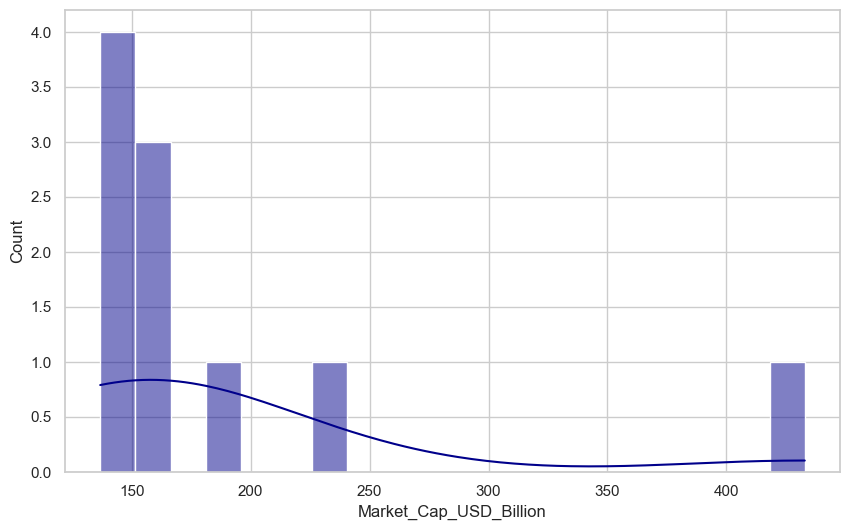

In [11]:
# Distribution of Market Cap (US$ Billion)
plt.figure(figsize=(10,6))
# Set the style for seaborn
sns.set(style="whitegrid")
# Plot the distribution of market cap
sns.histplot(
    banks_pd["Market_Cap_USD_Billion"],
    bins=20, 
    kde=True, 
    color="darkblue")

##**3.3. Top 10 Banks** <font color = red>[5 Marks]</font> <br>

Identify the top 10 banks by market capitalization using a bar chart

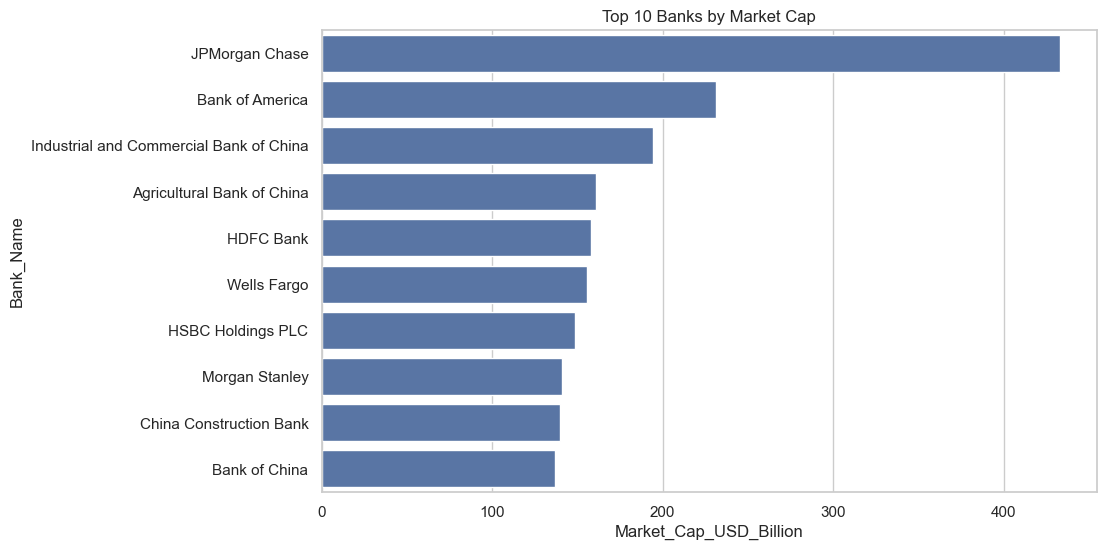

In [13]:
# Top 10 Banks by Market Cap
top10 = banks_pd.sort_values(by="Market_Cap_USD_Billion", ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(
    x="Market_Cap_USD_Billion", 
    y="Bank_Name", 
    data=top10
)
# Sort the DataFrame by market cap in descending order
top10 = banks_pd.sort_values(by="Market_Cap_USD_Billion", ascending=False).head(10)

# Plot the top 10 banks by market cap
plt.title("Top 10 Banks by Market Cap")
plt.show()

##**3.4. Market Cap vs Bank Ranking** <font color = red>[5 Marks]</font> <br>

Visualize the relationship between market capitalization and bank ranking using a scatter plot

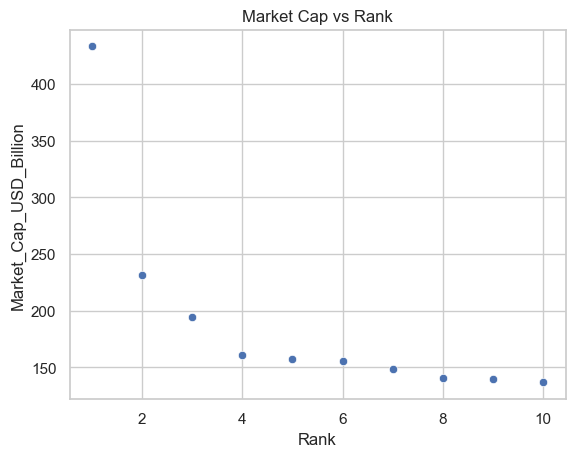

In [14]:
# Market Cap vs Rank
sns.scatterplot(x="Rank", y="Market_Cap_USD_Billion", data=banks_pd)

# Plot market cap vs rank
plt.title("Market Cap vs Rank")
plt.show()

##**3.5. Market Cap Analysis** <font color = red>[5 Marks]</font> <br>

Use a boxplot to examine the spread and outliers in market capitalization.

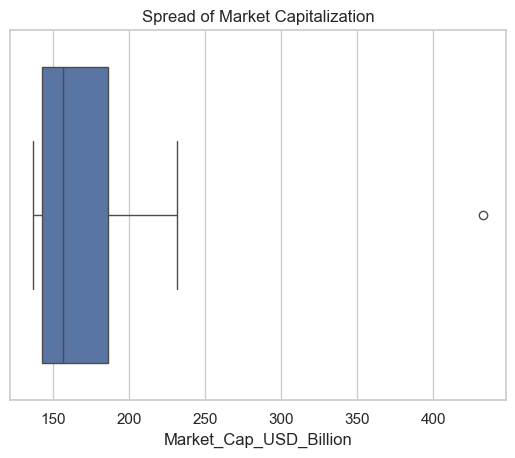

In [15]:
# Boxplot of Market Cap
sns.boxplot(x=banks_pd["Market_Cap_USD_Billion"])

#To show the spread and outliers in the market capitalization data.
plt.title("Spread of Market Capitalization")

# Plot a boxplot of market cap
plt.show()

##**3.6. Market Cap Quartile Distribution** <font color = red>[5 Marks]</font> <br>

Display the quartile distribution of market capitalization using a violin plot.

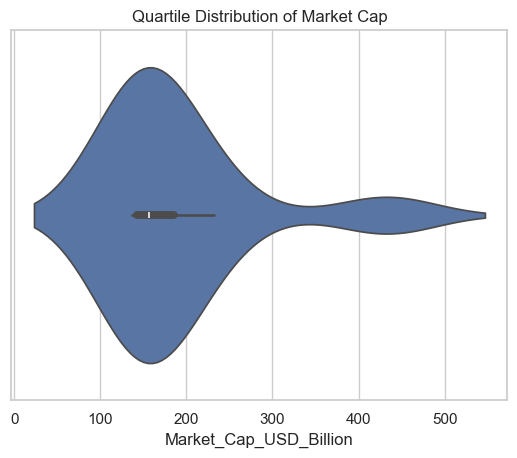

In [16]:
# Market Cap Distribution by Quartile
sns.violinplot(x=banks_pd["Market_Cap_USD_Billion"])
plt.title("Quartile Distribution of Market Cap")
plt.show()

##**3.7. Cumulative Market Share Analysis** <font color = red>[5 Marks]</font> <br>

Compute cumulative market share and visualize it with a line plot.

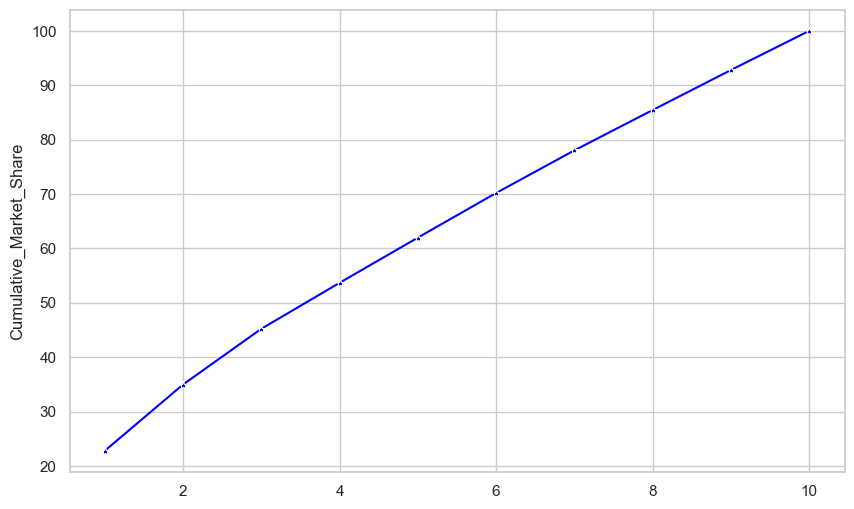

In [17]:
# Cumulative Market Share
banks_pd["Cumulative_Market_Cap"] = banks_pd["Market_Cap_USD_Billion"].cumsum()
total_market_cap = banks_pd["Market_Cap_USD_Billion"].sum()
banks_pd["Cumulative_Market_Share"] = (banks_pd["Cumulative_Market_Cap"] / total_market_cap) * 100



plt.figure(figsize=(10,6))
sns.lineplot(
    x=range(1, len(banks_pd)+1), 
    y=banks_pd["Cumulative_Market_Share"],
    marker="*",
    color="blue"
)
# Plot
plt.show()

##**3.8. Categorising Banks** <font color = red>[5 Marks]</font> <br>

Categorize banks into market capitalization ranges and analyze their distribution using a bar chart.

C:\Users\HP\AppData\Local\Temp\ipykernel_5408\1911744431.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index, y=range_counts.values, palette="Blues_d")


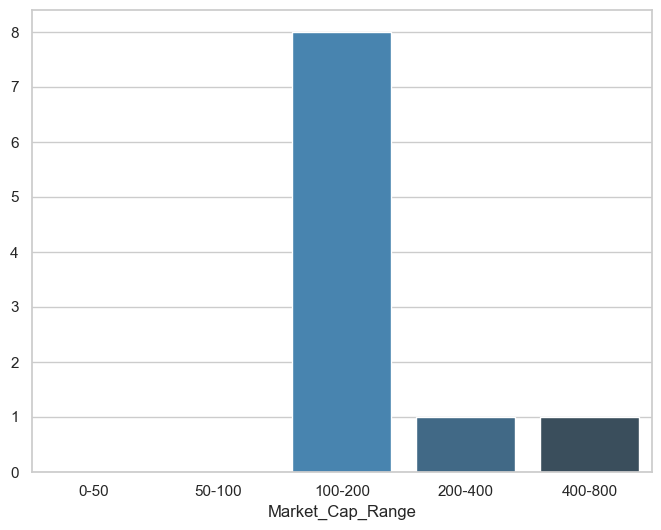

In [18]:
# Market Cap Range Distribution
bins = [0, 50, 100, 200, 400, 800]
labels = ["0-50", "50-100", "100-200", "200-400", "400-800"]

# Create market cap ranges
banks_pd["Market_Cap_Range"] = pd.cut(
    banks_pd["Market_Cap_USD_Billion"], 
    bins=bins, 
    labels=labels, 
    include_lowest=True
)
range_counts = banks_pd["Market_Cap_Range"].value_counts().sort_index()
# Plot
plt.figure(figsize=(8,6))
sns.barplot(x=range_counts.index, y=range_counts.values, palette="Blues_d")
plt.show()

##**3.9. Visualise Market Share Distribution** <font color = red>[5 Marks]</font> <br>


Calculate and display market share distribution among the top 10 banks using a pie chart.

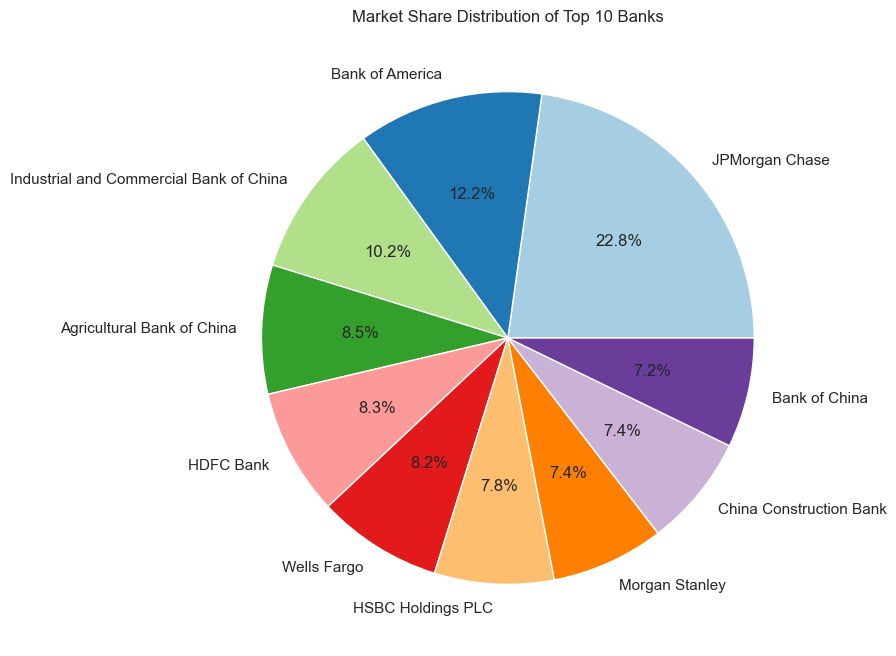

In [19]:
# Top 10 Banks Market Share
top10 = banks_pd.sort_values(by="Market_Cap_USD_Billion", ascending=False).head(10)
# Calculate market share percentage for top 10 banks
total_market_cap = top10["Market_Cap_USD_Billion"].sum()
top10["Market_Share_Percent"] = (top10["Market_Cap_USD_Billion"] / total_market_cap) * 100

# Plot
plt.figure(figsize=(8,8))
plt.pie(
    top10["Market_Share_Percent"], 
    labels=top10["Bank_Name"],
    autopct="%1.1f%%",
    colors=plt.cm.Paired.colors
)

plt.title("Market Share Distribution of Top 10 Banks")
plt.show()

#**4. ETL and Querying** <font color = red>[45 marks]</font> <br>

In [20]:
#Imports & Spark Session Initialization

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, lit, round
import logging
from datetime import datetime
import sqlite3
import pandas as pd

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("BankingDataAnalysis") \
    .getOrCreate()

# Logging Configuration
logfile = "code_log.txt"

In [21]:
#Logging Function

def log_progress(msg):
    timeformat = '%Y-%h-%d-%H:%M:%S'
    timestamp = datetime.now().strftime(timeformat)
    with open(logfile, 'a') as f:
        f.write(f"{timestamp} : {msg}\n")

In [22]:
# Import required functions
from pyspark.sql.functions import col, avg, sum, count, desc, asc, round, lag, dense_rank, ntile, when, first, lead
from pyspark.sql.window import Window

# First, let's rename your columns to match our queries (if needed)
pyspark_df = pyspark_df.toDF("Rank", "Bank_Name", "Market_Cap_USD_Billion")
# Create window specifications
window_by_marketcap = Window.orderBy(col("Market_Cap_USD_Billion").desc())
window_by_rank = Window.orderBy(col("Rank").asc())
window_partitioned = Window.partitionBy("Bank_Name").orderBy(col("Market_Cap_USD_Billion").desc())

##**4.1. Market Capitalization Analysis** <font color = red>[3 marks]</font> <br>

Q: Perform Advanced Market Capitalization Analysis with Growth Metrics

In [23]:
# Query: Advanced Market Cap Analysis with Growth Metrics
windowSpec = Window.orderBy(col("Market_Cap_USD_Billion").desc())
growth_df = pyspark_df.withColumn(
    "Prev_Market_Cap", lag("Market_Cap_USD_Billion").over(windowSpec)) \
.withColumn("Growth", col("Market_Cap_USD_Billion") - col("Prev_Market_Cap"))
growth_df.show(10)

+----+--------------------+----------------------+---------------+-------------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Prev_Market_Cap|             Growth|
+----+--------------------+----------------------+---------------+-------------------+
|   1|      JPMorgan Chase|                432.92|           NULL|               NULL|
|   2|     Bank of America|                231.52|         432.92|             -201.4|
|   3|Industrial and Co...|                194.56|         231.52| -36.96000000000001|
|   4|Agricultural Bank...|                160.68|         194.56|-33.879999999999995|
|   5|           HDFC Bank|                157.91|         160.68|-2.7700000000000102|
|   6|         Wells Fargo|                155.87|         157.91| -2.039999999999992|
|   7|   HSBC Holdings PLC|                 148.9|         155.87| -6.969999999999999|
|   8|      Morgan Stanley|                140.83|          148.9| -8.069999999999993|
|   9|China Constructio...|                

##4.2.**Market Concentration Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Market Concentration and Categorize Banks Based on Market Share Tiers

In [24]:
# Market Concentration Analysis
pyspark_df.withColumn("Tier",
    when(col("Market_Cap_USD_Billion") > 300, "Tier 1")
    .when(col("Market_Cap_USD_Billion") > 100, "Tier 2")
    .otherwise("Tier 3")
).groupBy("Tier").count().show()

+------+-----+
|  Tier|count|
+------+-----+
|Tier 2|    9|
|Tier 1|    1|
+------+-----+



##**4.3. Market Capitalization Distribution** <font color = red>[6 marks]</font> <br>

Q: Examine Statistical Distribution of Market Capitalization Using Quartile Analysis

In [25]:
# Import required functions
from pyspark.sql.functions import (col, avg, sum, count, desc, asc, round, lag,
                                 dense_rank, ntile, when, first, lead, min, max, lit)
from pyspark.sql.window import Window

# Query 3: Statistical Distribution Analysis
quartile_df = pyspark_df.withColumn("Quartile", ntile(4).over(windowSpec))
quartile_stats = quartile_df.groupBy("Quartile").agg(
    avg("Market_Cap_USD_Billion").alias("Avg_Market_Cap"),
    min("Market_Cap_USD_Billion").alias("Min_Market_Cap"),
    max("Market_Cap_USD_Billion").alias("Max_Market_Cap"),
    count("Bank_Name").alias("Num_Banks")
)
quartile_stats.orderBy("Quartile").show()

+--------+------------------+--------------+--------------+---------+
|Quartile|    Avg_Market_Cap|Min_Market_Cap|Max_Market_Cap|Num_Banks|
+--------+------------------+--------------+--------------+---------+
|       1| 286.3333333333333|        194.56|        432.92|        3|
|       2|158.15333333333334|        155.87|        160.68|        3|
|       3|           144.865|        140.83|         148.9|        2|
|       4|           138.315|        136.81|        139.82|        2|
+--------+------------------+--------------+--------------+---------+



##**4.4. Comparative Size Analysis** <font color = red>[6 marks]</font> <br>

Q: Conduct Comparative Size Analysis to Classify Banks by Relative Market Size

In [26]:
# Comparative Size Analysis
pyspark_df.withColumn("Relative_Market_Size",
    when(col("Market_Cap_USD_Billion") > 400, "Large")
    .when(col("Market_Cap_USD_Billion") > 200, "Medium")
    .otherwise("Small")
).groupBy("Relative_Market_Size").count().show()

+--------------------+-----+
|Relative_Market_Size|count|
+--------------------+-----+
|              Medium|    1|
|               Large|    1|
|               Small|    8|
+--------------------+-----+



##**4.5. Market Growth Analysis** <font color = red>[6 marks]</font> <br>

Q: Evaluate Market Growth and Identify Gaps Between Consecutive Banks

In [27]:
windowSpec = Window.orderBy(col("Market_Cap_USD_Billion").desc())


banks_growth = pyspark_df.withColumn(
    "Prev_Market_Cap", lag("Market_Cap_USD_Billion").over(windowSpec)
).withColumn(
    "Next_Market_Cap", lead("Market_Cap_USD_Billion").over(windowSpec)
)


banks_growth = banks_growth.withColumn(
    "Growth_vs_Prev", round(col("Market_Cap_USD_Billion") - col("Prev_Market_Cap"), 2)
)


banks_growth = banks_growth.withColumn(
    "Gap_vs_Next", round(col("Market_Cap_USD_Billion") - col("Next_Market_Cap"), 2)
)

banks_growth.select(
    "Rank", "Bank_Name", "Market_Cap_USD_Billion", 
    "Prev_Market_Cap", "Next_Market_Cap", 
    "Growth_vs_Prev", "Gap_vs_Next"
).show(15)


+----+--------------------+----------------------+---------------+---------------+--------------+-----------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|Prev_Market_Cap|Next_Market_Cap|Growth_vs_Prev|Gap_vs_Next|
+----+--------------------+----------------------+---------------+---------------+--------------+-----------+
|   1|      JPMorgan Chase|                432.92|           NULL|         231.52|          NULL|      201.4|
|   2|     Bank of America|                231.52|         432.92|         194.56|        -201.4|      36.96|
|   3|Industrial and Co...|                194.56|         231.52|         160.68|        -36.96|      33.88|
|   4|Agricultural Bank...|                160.68|         194.56|         157.91|        -33.88|       2.77|
|   5|           HDFC Bank|                157.91|         160.68|         155.87|         -2.77|       2.04|
|   6|         Wells Fargo|                155.87|         157.91|          148.9|         -2.04|       6.97|
|   7|   H

##**4.6. Market Dominance Analysis** <font color = red>[6 marks]</font> <br>

Q: Assess Market Dominance by Measuring Cumulative Share and Dominance Score

In [28]:
# Market Dominance Analysis
dominance_df = pyspark_df.withColumn("Cumulative_Share",
    sum("Market_Cap_USD_Billion").over(windowSpec))
dominance_df.show(10)

+----+--------------------+----------------------+------------------+
|Rank|           Bank_Name|Market_Cap_USD_Billion|  Cumulative_Share|
+----+--------------------+----------------------+------------------+
|   1|      JPMorgan Chase|                432.92|            432.92|
|   2|     Bank of America|                231.52|            664.44|
|   3|Industrial and Co...|                194.56|             859.0|
|   4|Agricultural Bank...|                160.68|1019.6800000000001|
|   5|           HDFC Bank|                157.91|1177.5900000000001|
|   6|         Wells Fargo|                155.87|           1333.46|
|   7|   HSBC Holdings PLC|                 148.9|1482.3600000000001|
|   8|      Morgan Stanley|                140.83|           1623.19|
|   9|China Constructio...|                139.82|           1763.01|
|  10|       Bank of China|                136.81|           1899.82|
+----+--------------------+----------------------+------------------+



##**4.7. Segment-Wise Bank Analysis** <font color = red>[6 marks]</font> <br>

Q: Analyze Segment-Wise Bank Performance Based on Market Capitalization Ranges

In [29]:
# Segment Performance Analysis

banks_segmented = pyspark_df.withColumn(
    "Segment",
    when(col("Market_Cap_USD_Billion") >= 200, "Tier 1: Large Banks") \
    .when((col("Market_Cap_USD_Billion") >= 50) & (col("Market_Cap_USD_Billion") < 200), "Tier 2: Medium Banks") \
    .otherwise("Tier 3: Small Banks")
)


segment_stats = banks_segmented.groupBy("Segment").agg(
    count("Bank_Name").alias("Num_Banks"),
    avg("Market_Cap_USD_Billion").alias("Avg_Market_Cap"),
    min("Market_Cap_USD_Billion").alias("Min_Market_Cap"),
    max("Market_Cap_USD_Billion").alias("Max_Market_Cap")
)

# Step 3: Show results
segment_stats.orderBy("Segment").show()


+--------------------+---------+--------------+--------------+--------------+
|             Segment|Num_Banks|Avg_Market_Cap|Min_Market_Cap|Max_Market_Cap|
+--------------------+---------+--------------+--------------+--------------+
| Tier 1: Large Banks|        2|        332.22|        231.52|        432.92|
|Tier 2: Medium Banks|        8|      154.4225|        136.81|        194.56|
+--------------------+---------+--------------+--------------+--------------+



##**4.8. Performance Dashboard** <font color = red>[6 marks]</font> <br>

Q: Generate a Comprehensive Performance Dashboard for Bank Rankings and Metrics

C:\Users\HP\AppData\Local\Temp\ipykernel_5408\2125290452.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


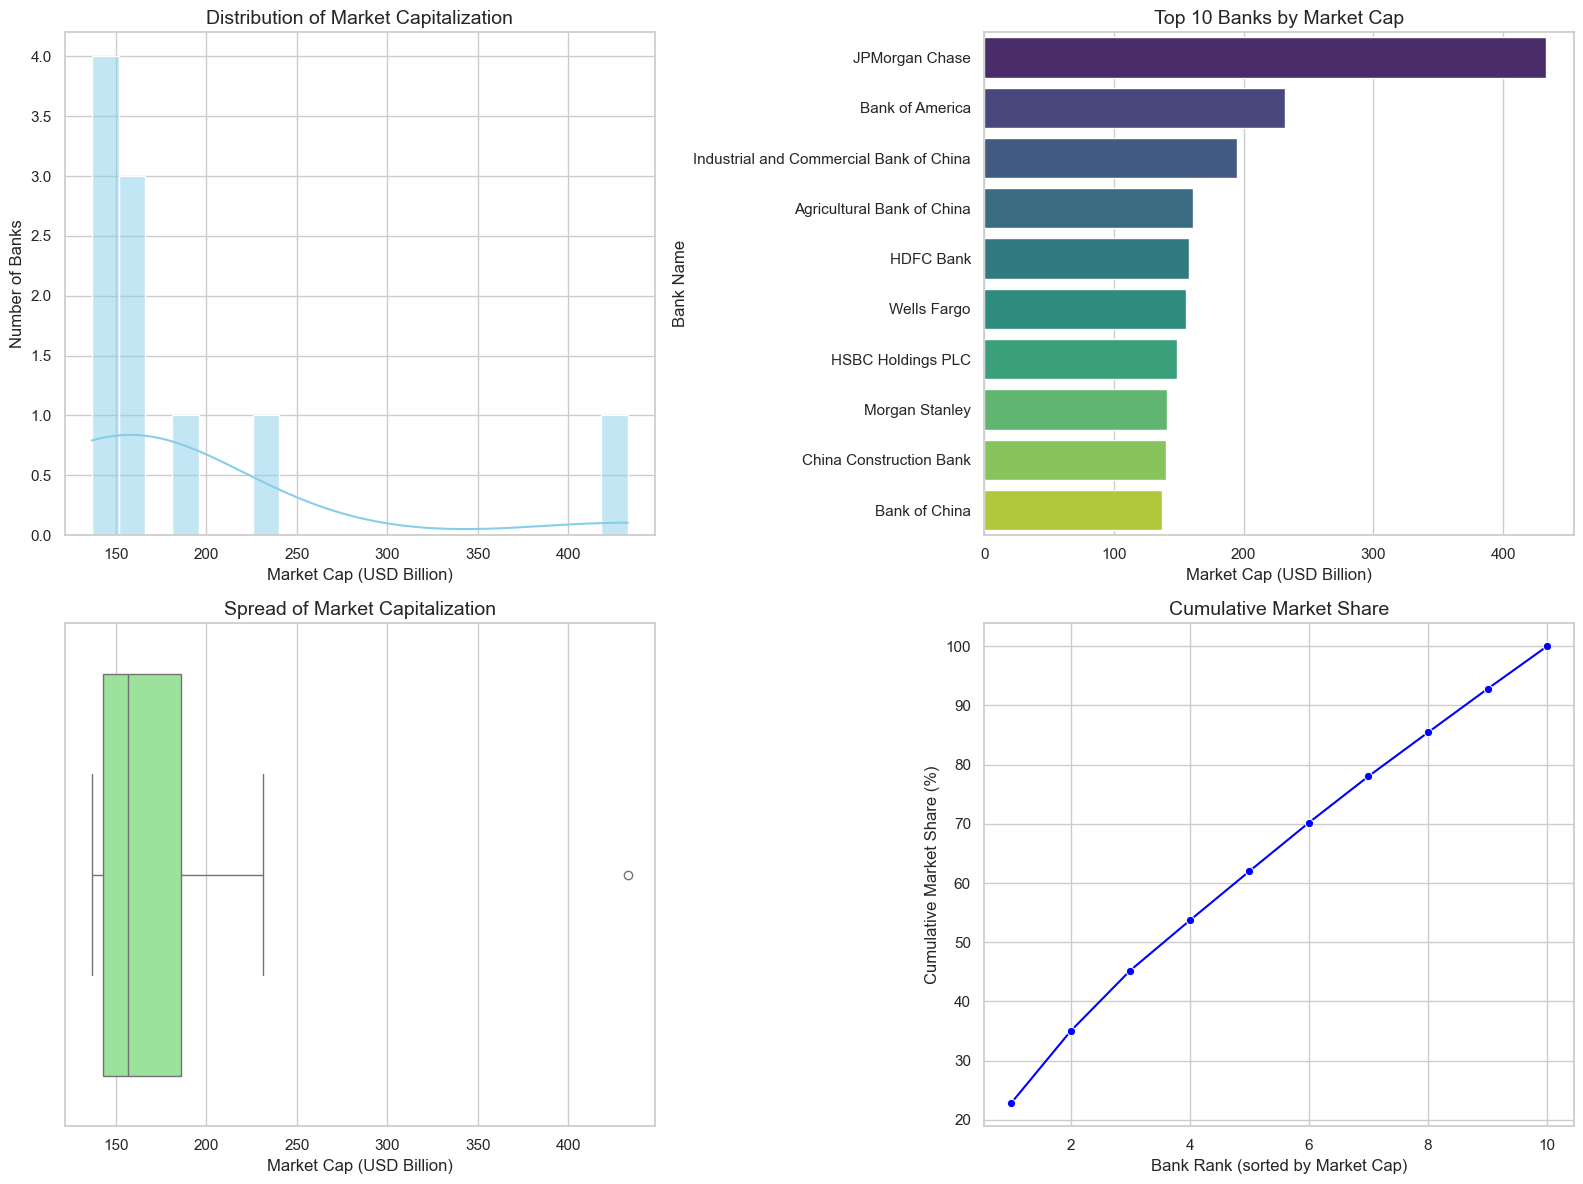

In [30]:
# Comprehensive Performance Dashboard
banks_pd = pyspark_df.toPandas()
sns.set(style="whitegrid")

# Create a dashboard layout
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# 1. Histogram: Distribution of Market Cap
sns.histplot(
    banks_pd["Market_Cap_USD_Billion"], bins=20, kde=True, color="skyblue", ax=axes[0,0]
)
axes[0,0].set_title("Distribution of Market Capitalization", fontsize=14)
axes[0,0].set_xlabel("Market Cap (USD Billion)")
axes[0,0].set_ylabel("Number of Banks")

# 2. Bar Chart: Top 10 Banks by Market Cap
top10 = banks_pd.sort_values(by="Market_Cap_USD_Billion", ascending=False).head(10)
sns.barplot(
    x="Market_Cap_USD_Billion", y="Bank_Name", data=top10, palette="viridis", ax=axes[0,1]
)
axes[0,1].set_title("Top 10 Banks by Market Cap", fontsize=14)
axes[0,1].set_xlabel("Market Cap (USD Billion)")
axes[0,1].set_ylabel("Bank Name")

# 3. Boxplot: Spread and Outliers
sns.boxplot(x=banks_pd["Market_Cap_USD_Billion"], color="lightgreen", ax=axes[1,0])
axes[1,0].set_title("Spread of Market Capitalization", fontsize=14)
axes[1,0].set_xlabel("Market Cap (USD Billion)")

# 4. Line Plot: Cumulative Market Share
banks_pd_sorted = banks_pd.sort_values(by="Market_Cap_USD_Billion", ascending=False)
banks_pd_sorted["Cumulative_Market_Cap"] = banks_pd_sorted["Market_Cap_USD_Billion"].cumsum()
total_market_cap = banks_pd_sorted["Market_Cap_USD_Billion"].sum()
banks_pd_sorted["Cumulative_Market_Share"] = (banks_pd_sorted["Cumulative_Market_Cap"] / total_market_cap) * 100

sns.lineplot(
    x=range(1, len(banks_pd_sorted)+1),
    y=banks_pd_sorted["Cumulative_Market_Share"],
    marker="o", color="blue", ax=axes[1,1]
)
axes[1,1].set_title("Cumulative Market Share", fontsize=14)
axes[1,1].set_xlabel("Bank Rank (sorted by Market Cap)")
axes[1,1].set_ylabel("Cumulative Market Share (%)")

plt.tight_layout()
plt.show()



### 5.Conclusion

#### 5.1. Recommendations to track and compare market capitalisation of the top global banks toevaluate competitiveness and dominance.

* Maintain rankings and compare market caps to evaluate competitiveness and dominance.

#### 5.2 Suggestions to use cross-currency analysis (USD, GBP, EUR, INR) for consistent benchmarking of financial institutions across regions.

* Convert market caps into USD, GBP, EUR, INR for fair global comparisons.


#### 5.3 Propose continuous monitoring of market share concentration to identify growth opportunities for mid-tier banks.
* Continuously track market share concentration to spot growth opportunities for mid-tier banks.


#### 5.4 Identify potential regions or banking segments for expansion by analysing gaps between tiers of banks and regional trends.
* identify regions or segments for growth by analyzing gaps between tiers and regional trends.

In [ ]:
# Visualization Setup Section

# 1. Prepare data for visualization platforms
# 2. Generate Tableau connection instructions

# 3. Generate Power BI connection instructions

# 4. Execute visualization setup
# 5. Sample Dashboard Layout (Documentation)
